In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../../python/darkflow_tools')
import argparse
import os
import subprocess
import cv2

import parse_yolo_cfg as yolocfg
import voc_tools
import darknet_scripts
import run_darkflow

In [2]:
config = 'yolo_train.yml'
cfg_obj = yolocfg.read_yaml_main_config(config)

darkflow_folder = cfg_obj.darkflow_bin_path()
sys.path.append(darkflow_folder)
from darkflow.net.build import TFNet

In [3]:
options = run_darkflow.darkflow_parse_config(cfg_obj)
options['load'] = -1
tfnet = TFNet(options)

Parsing /home/xico/repo/gr-mymodules/gr-specmonitor/scripts/deep_learning/yolo_model.cfg
Loading None ...
Finished in 0.000115871429443s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 104, 104, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 13, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 13, 13, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 13, 13, 128)
 Init  |  Yep!  | conv 1x1p0_1    linear           | (?, 13, 13, 56)
-------+--------+

Going to open file: /home/xico/Dropbox/Programming/deep_learning/test_voc/JPEGImages/data_wifi_0_0_0_0_0.jpg


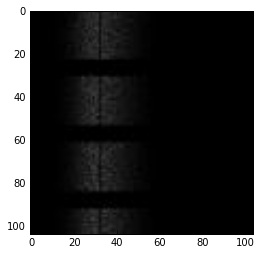

In [5]:
onlyfiles = [f for f in os.listdir(options['imgdir']) if os.path.isfile(os.path.join(options['imgdir'], f))]
fname = os.path.join(options['imgdir'], onlyfiles[0])
print 'Going to open file:',fname
imgcv = cv2.imread(fname)
#cv2.imshow('image',imgcv)
plt.imshow(imgcv,cmap='gray')
plt.show()

In [6]:
result = tfnet.return_predict(imgcv)
print result

[{'topleft': {'y': 0, 'x': 4}, 'confidence': 0.99836016, 'bottomright': {'y': 22, 'x': 60}, 'label': 'wifi'}, {'topleft': {'y': 25, 'x': 4}, 'confidence': 0.97585064, 'bottomright': {'y': 56, 'x': 60}, 'label': 'wifi'}, {'topleft': {'y': 59, 'x': 6}, 'confidence': 0.85606694, 'bottomright': {'y': 85, 'x': 58}, 'label': 'wifi'}, {'topleft': {'y': 92, 'x': 4}, 'confidence': 0.99917048, 'bottomright': {'y': 103, 'x': 61}, 'label': 'wifi'}]


In [9]:
%timeit tfnet.return_predict(imgcv)

10 loops, best of 3: 18.2 ms per loop


### Open a path-specified picture and predict

 this is the image shape: (104, 104, 3)


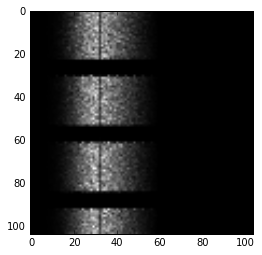

In [6]:
fname = os.path.expanduser('~/tmp/test.png')
imgcv = cv2.imread(fname)
print 'this is the image shape:',imgcv.shape
plt.imshow(imgcv,cmap='gray')
plt.show()

In [7]:
result = tfnet.return_predict(imgcv)
print result

[{'topleft': {'y': 66, 'x': 5}, 'confidence': 0.99933374, 'bottomright': {'y': 74, 'x': 60}, 'label': 'wifi'}, {'topleft': {'y': 93, 'x': 0}, 'confidence': 0.99961978, 'bottomright': {'y': 103, 'x': 76}, 'label': 'wifi'}, {'topleft': {'y': 44, 'x': 29}, 'confidence': 0.72093236, 'bottomright': {'y': 78, 'x': 38}, 'label': 'square'}]
